Mathematics Behind Logistic Regression
1. Model Representation
Logistic regression predicts the probability of a binary outcome. The model uses the logistic (sigmoid) function:
$$ h_\theta(x) = \frac{1}{1 + e^{-\theta^Tx}} $$
Where:

$h_\theta(x)$: Predicted probability (between 0 and 1)
$\theta$: Model parameters (weights)
$x$: Input features
$\theta^Tx$: Linear combination of features and weights

2. Sigmoid Function
The sigmoid function maps any real number to (0,1):
$$ \sigma(z) = \frac{1}{1 + e^{-z}} $$
Properties:

Output range: (0,1)
As $z \to \infty$, $\sigma(z) \to 1$
As $z \to -\infty$, $\sigma(z) \to 0$

3. Cost Function
We use the log loss (binary cross-entropy) with L2 regularization:
$$ J(\theta) = -\frac{1}{m} \sum_{i=1}^m [y^{(i)} \log(h_\theta(x^{(i)})) + (1-y^{(i)}) \log(1-h_\theta(x^{(i)}))] + \frac{\lambda}{2m} \sum_{j=1}^n \theta_j^2 $$
Where:

$m$: Number of training examples
$y^{(i)}$: True label for $i$-th example
$h_\theta(x^{(i)})$: Predicted probability for $i$-th example
$\lambda$: Regularization parameter
$n$: Number of features

4. Gradient Descent
To minimize $J(\theta)$, we update parameters using gradient descent:
$$ \theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j} $$
The partial derivative is:
$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)} + \frac{\lambda}{m} \theta_j $$
Where:

$\alpha$: Learning rate
$x_j^{(i)}$: $j$-th feature of $i$-th example

5. Prediction
For a new input $x$, compute:
$$ z = \theta^Tx + b $$
Apply sigmoid and threshold at 0.5:

If $\sigma(z) \geq 0.5$, predict class 1
If $\sigma(z) < 0.5$, predict class 0


In [23]:
import numpy as np
import matplotlib.pyplot as plt

class LogisticRegression:
    def __init__(self,learning_rate=0.01,num_iterations=1000):
        self.learning_rate=learning_rate
        self.num_iterations =num_iterations
        self.weights=None
        self.bias=None

    def sigmoid(self,z):
        return 1/(1+np.exp(-z))

    def fit(self,X,y):
        n_samples,n_features=X.shape

#         weights and bias
        self.weights=np.zeros(n_features)
        self.bias=0

#         Gradient descent
        for _ in range(self.num_iterations):
            linear_model=np.dot(X,self.weights)+self.bias
            y_predicted=self.sigmoid(linear_model)

#             Gradient computing
            dw=(1/n_samples)*np.dot(X.T,(y_predicted-y))
            db=(1/n_samples)*np.sum(y_predicted-y)

            self.weights -= self.learning_rate*dw
            self.bias -= self.learning_rate*db
    def predict(self,X):
        linear_model=np.dot(X,self.weights)+self.bias
        y_predicted=self.sigmoid(linear_model)
        return (y_predicted>=0.5).astype(int)



if __name__=='__main__':
    X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6],[5,9]])
    y = np.array([0, 0, 1, 1, 1,0])

    model=LogisticRegression(learning_rate=0.1,num_iterations=1000)
    model.fit(X,y)

    predictions=model.predict([1,9])
    print("Predictions:- ",predictions)




Predictions:-  0


In [56]:
# Advanced implementation of the logistic regression function
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

In [57]:
class LogisticRegression:
    def __init__(self,learning_rate=0.01,num_iterations=1000,l2_lambda=0.01,tol=1e-4):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.l2_lambda = l2_lambda
        self.tol = tol
        self.weights = None
        self.bias = None
        self.cost_history = []

    def sigmoid(self,z):
        z=np.clip(z,-500,500)
        return 1/(1+np.exp(-z))
    def compute_cost(self,X,y,y_pred):
        m=len(y)
        epsilon=1e-15
        y_pred=np.clip(y_pred,epsilon,1-epsilon)
        cost=(-1/m)*np.sum(y*np.log(y_pred)+(1-y)*np.log(1-y_pred))
        cost+=(self.l2_lambda/(2*m))* np.sum(np.square(self.weights))
        return cost

    def fit(self,X,y):
        n_samples,n_features=X.shape
        self.weights=np.random.rand(n_features)*0.01
        self.bias=0

        for i in range(self.num_iterations):
            linear_model=np.dot(X,self.weights)+self.bias
            y_pred=self.sigmoid(linear_model)
            cost=self.compute_cost(X,y,y_pred)
            self.cost_history.append(cost)

            dw=(1/n_samples)*np.dot(X.T,(y_pred-y))
            dw+=(self.l2_lambda/n_samples)+self.weights
            db=(1/n_samples)*np.sum(y_pred-y)

            self.weights -=self.learning_rate*dw
            self.bias-=self.learning_rate*db

            if i> 0 and abs(self.cost_history[i]-self.cost_history[i-1])<self.tol:
                print("Converged after",i,"iterations")
                break

    def predict_probs(self,X):
        linear_model=np.dot(X,self.weights)+self.bias
        return self.sigmoid(linear_model)

    def predict(self,X):
        return (self.predict_probs(X)>=0.5).astype(int)

    def plot_cost_history(self):
        plt.figure(figsize=(10,6))
        plt.plot(range(len(self.cost_history)),self.cost_history,color='blue',linewidth=2)
        plt.xlabel('Iteration')
        plt.ylabel('Cost')
        plt.title('Cost Function vs Iteration')
        plt.grid(True)
        plt.show()
    def plot_decision_boundary(self,X,y):
        if X.shape[1]!=2:
            print("decision boundary only works for 2-dimensional data")
            return
        plt.figure(figsize=(10,6))
        plt.scatter(X[y==0][:,0],X[y==0][:,1],color='blue', label='Class 0', alpha=0.6)
        plt.scatter(X[y==1][:,0],X[y==1][:,1],color='red', label='Class 1', alpha=0.6)

#         Decision boundary: w1*x1 + w2*x2 + b = 0 => x2 = -(w1*x1 + b)/w2
        x1_range=np.linspace(X[:,0].min()-0.5,X[:,0].max()+0.5,100)
        x2=-(self.weights[0]*x1_range+self.bias)/self.weights[1]

        plt.plot(x1_range,x2,color='green',linewidth=2,label="Decision Boundary")
        plt.xlabel('Feature 1 (normalized)')
        plt.ylabel('Feature 2 (normalized)')
        plt.title('Logistic Regression Decision Boundary')
        plt.legend()
        plt.grid(True)
        plt.show()

if __name__=='__main__':
    X,y=make_classification(n_samples=1000,
        n_features=2,
        n_classes=2,
        n_clusters_per_class=1,
        n_informative=2,
        n_redundant=0,
        random_state=42)





In [60]:
# Splitting the data

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#Normalizing the features
X_train=(X_train-X_train.mean(axis=0))/X_train.std(axis=0)
X_test=(X_test -X_test.mean(axis=0))/X_test.std(axis=0)

# training the model
model=LogisticRegression(learning_rate=0.1,
        num_iterations=1000,
        l2_lambda=0.01,
        tol=1e-5)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy :{accuracy:.4f}")
print("Classification Report:-\n",classification_report(y_test,y_pred))


Converged after 55 iterations
Accuracy :0.8950
Classification Report:-
               precision    recall  f1-score   support

           0       0.88      0.92      0.90       104
           1       0.91      0.86      0.89        96

    accuracy                           0.90       200
   macro avg       0.90      0.89      0.89       200
weighted avg       0.90      0.90      0.89       200



In [68]:
print("Sample predictions ")
probs=model.predict_probs(X_test[:5])
print(probs)
preds=y_pred[:5]
preds
for i in range(len(probs)):
    print(f"Sample {i+1}: Probability={probs[i]:.4f}, Predicted Class={preds[i]}, True Class={y_test[i]}")



Sample predictions 
[0.53944461 0.38059525 0.46992636 0.39941861 0.38308528]
Sample 1: Probability=0.5394, Predicted Class=1, True Class=1
Sample 2: Probability=0.3806, Predicted Class=0, True Class=0
Sample 3: Probability=0.4699, Predicted Class=0, True Class=0
Sample 4: Probability=0.3994, Predicted Class=0, True Class=0
Sample 5: Probability=0.3831, Predicted Class=0, True Class=0


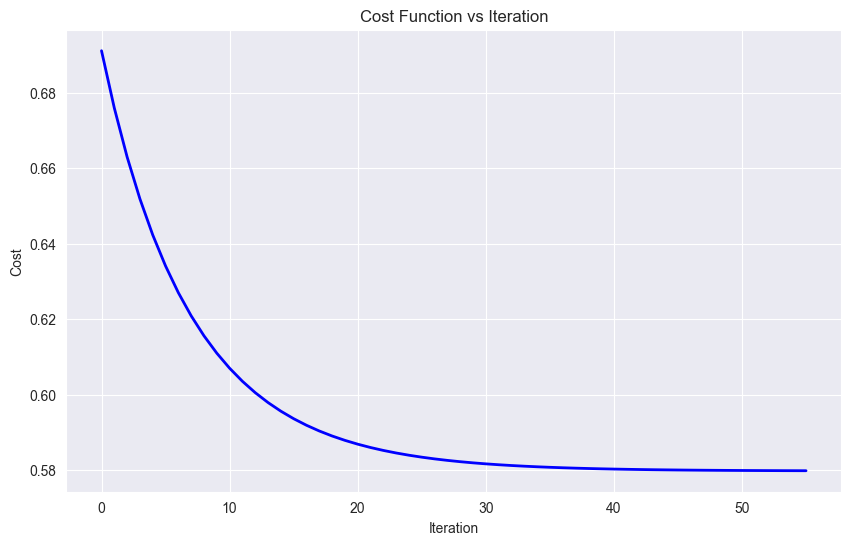

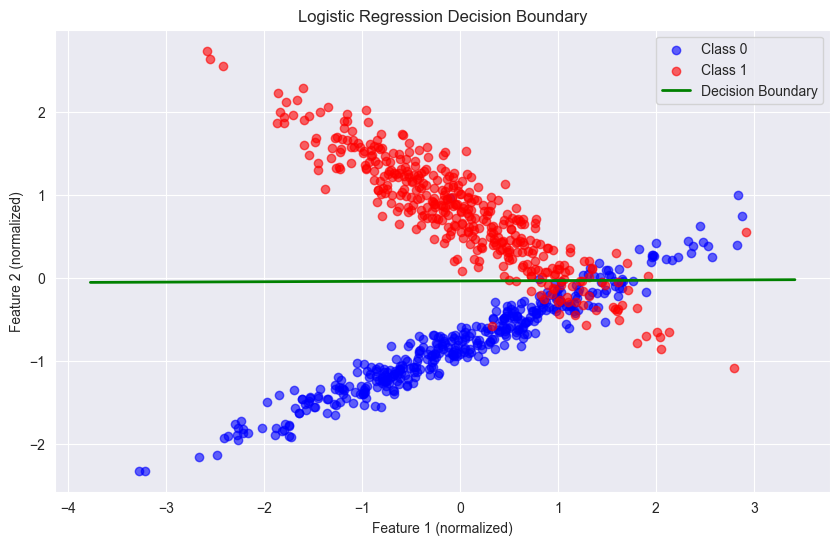

In [69]:
model.plot_cost_history()
model.plot_decision_boundary(X_train, y_train)